# Data Project - Stock Market Analysis 

Welcome to your second data project! In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks' closing prices?
    5.) What was the correlation between different stocks' daily returns?
    6.) How much value do we put at risk by investing in a particular stock?
    7.) How can we attempt to predict future stock behavior?

#### Basic Analysis of Stock Information

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# reading stock data from yahoo
from pandas.io.data import DataReader

# time stamps
from datetime import datetime

# division
from __future__ import division

/Users/alenamclucas/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
/Users/alenamclucas/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/alenamclucas/anaconda/lib/python2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
# tech stocks from yahoo
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# set end and start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

# grab yahoo finance data and set as dataframe
for stock in tech_list:   
    # set dataframe as the stock ticker
    # using globals() is sloppy but simple way of setting dataframe names
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [3]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,107.784585,108.859763,106.614901,107.759763,4.752859e+07,106.612288
std,9.988042,9.962810,9.920089,9.940576,2.121990e+07,9.310141
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,90.339996
25%,97.989998,99.110001,96.839996,97.900002,3.316960e+07,97.550003
50%,108.970001,110.000000,107.550003,108.739998,4.288500e+07,107.562151
75%,115.760002,116.529999,114.099998,115.209999,5.579100e+07,113.409314
max,132.850006,132.970001,130.699997,132.070007,1.622063e+08,129.419998


In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-07-01 to 2016-06-30
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


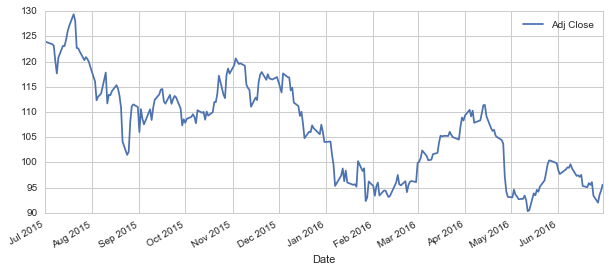

In [6]:
# plot a historical view of closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

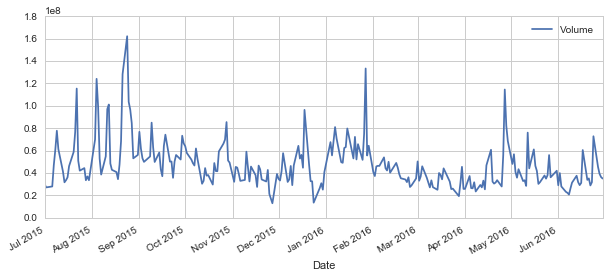

In [7]:
# plot total volume of stock being traded each day over past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

Calculate the moving average for the stock. For more info on the moving average check out:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [8]:
# pandas has a built-in rolling mean calculator
# plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

/Users/alenamclucas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/alenamclucas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/Users/alenamclucas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


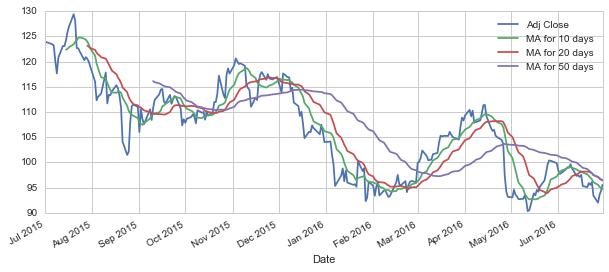

In [9]:
# plot additional moving averages
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

#### Section 2 - Daily Return Analysis

Analyze the risk of the stock. Take a closer look at the daily changes of the stock and not just its absolute value. Use pandas to retrieve the daily returns for the Apple stock.

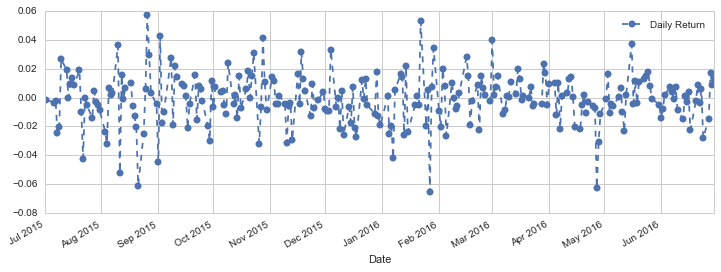

In [11]:
# use pct_change to find percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

# plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',
                          marker='o')

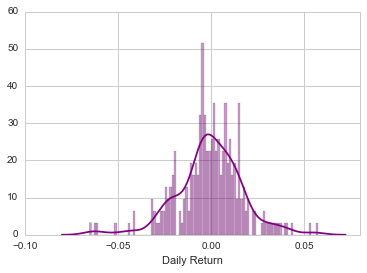

In [12]:
# use seaborn to plot histogram and kde plot
# use of dropna() here because NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

# could have also done:
#AAPL['Daily Return'].hist()

In [13]:
# analyze teruns of all stocks
# grab all closing prices for the tech stock list into one dataframe
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,
                        end)['Adj Close']

In [14]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-07-01,124.059746,437.390015,521.840027,43.247972
2015-07-02,123.902960,437.709991,523.400024,43.199325
2015-07-06,123.471786,436.040009,522.859985,43.189593
2015-07-07,123.168009,436.720001,525.020020,43.102027
2015-07-08,120.110610,429.700012,516.830017,43.043652


In [15]:
# get daily return for all stocks like we did for apple stock
# make new tech returns dataframe
tech_rets = closing_df.pct_change()

/Users/alenamclucas/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/Users/alenamclucas/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:600: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


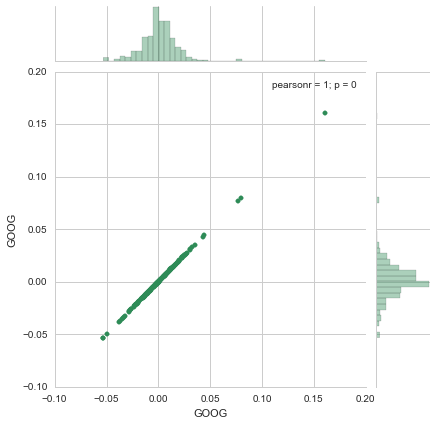

In [16]:
# now can compare daily percentage return of two stocks to see correlation
# compare Google to itself should show perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

/Users/alenamclucas/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


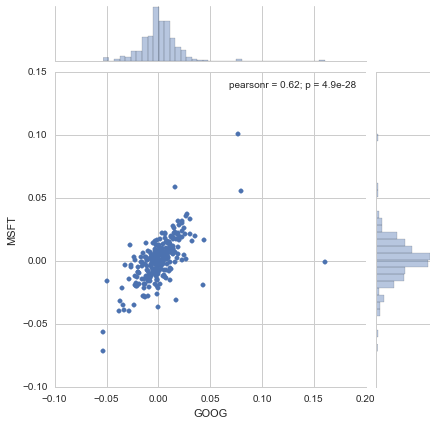

In [17]:
# use joinplot to compare daily returns of google and microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

The pearson value (Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it here:  http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient For a quick intuitive sense, check out the picture below:

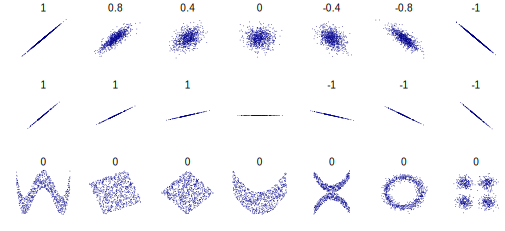

In [18]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

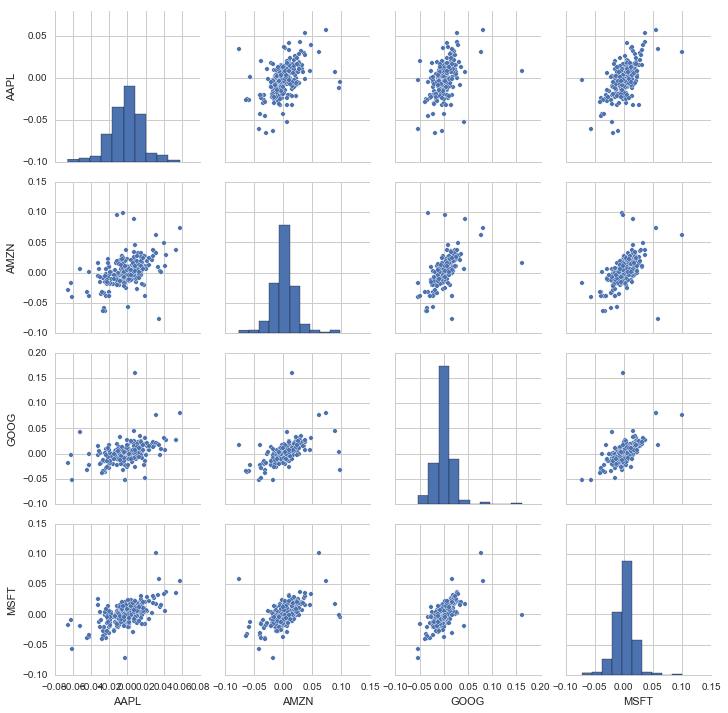

In [19]:
# call pairplot on our dataframe for an automatic visual analysis of all
# the comparisons
sns.pairplot(tech_rets.dropna())

An interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

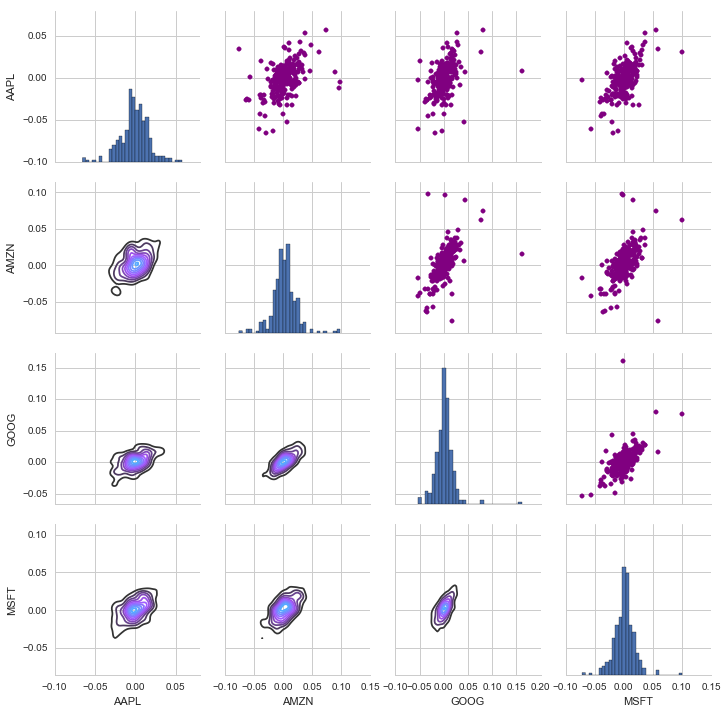

In [20]:
# set up figure by naming it returns_fig, call PairPLot on the dataframe
returns_fig = sns.PairGrid(tech_rets.dropna())

# use map_upper to specify what the upper triangle will look like
returns_fig.map_upper(plt.scatter,color='purple')

# define the lower triangle in the figure, including the plot type (kde)
# and color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

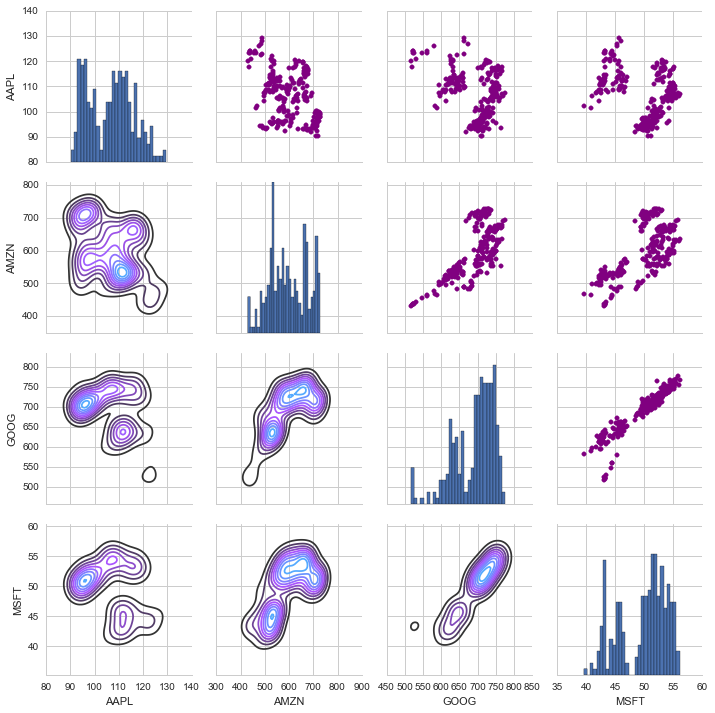

In [21]:
# same analysis on closing price
# set up figure by naming it returns_fig, call PairPlot on the dataframe
returns_fig = sns.PairGrid(closing_df)

# use map_upper to specify what the upper triangle will look like
returns_fig.map_upper(plt.scatter,color='purple')

# define the lower triangle in the figure, including the plot type (kde)
# and color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

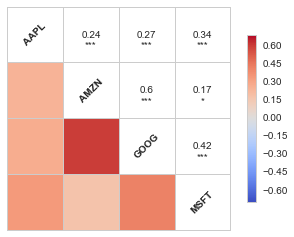

In [21]:
# use seaborn for a quick correlation plot of the daily returns to get
# actual numerical values
sns.corrplot(tech_rets.dropna(),annot=True)

We see numerically and visually that Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

#### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

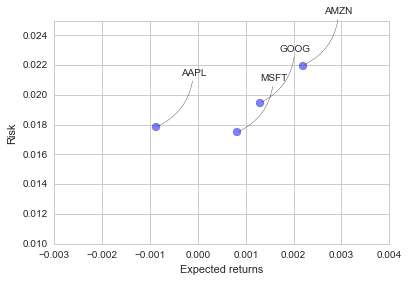

In [22]:
# define a new dataframe as a clenaed version of the original tech_rets
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),alpha=0.5,s=area)

# set the x and y limits of the plot
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

# set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# label the scatter plots, for more info check out the link:
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label, 
        xy=(x,y),xytext=(50,50),
        textcoords='offset points',ha='right',va='bottom',
        arrowprops=dict(arrowstyle='-',connectionstyle='arc3,rad=-0.3'))

#### Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could  expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk.

#### Value at risk using the "bootstrap" method

For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

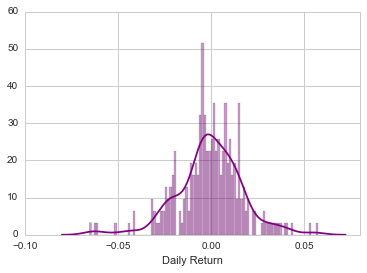

In [23]:
# repeat daily returns histogram for apple stock
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [25]:
# the 0.05 empirical quantile of daily returns gets risk value of stock
rets['AAPL'].quantile(0.05)

-0.02859644482707982

The 0.05 empirical quantile of daily returns is at -0.019. That means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $19,000. You could repeat this for the other stocks in out portfolio.

#### Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.


The equation for geometric Browninan motion is given by the following equation:

$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$ 

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$ 

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link:
http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG.

In [28]:
# set up time horizon
days = 365

# and delta
dt = 1/days

# grab mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [29]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,
    mu,sigma, and returns simulated price array'''
    
    # define a price array
    price = np.zeros(days)
    price[0] = start_price
    # shock and drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # run price array for number of days
    for x in xrange(1,days):
        # calculate shock
        shock[x] = np.random.normal(loc=mu * dt,scale=sigma * np.sqrt(dt))
        # calculate drift
        drift[x] = mu * dt
        # calculate price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

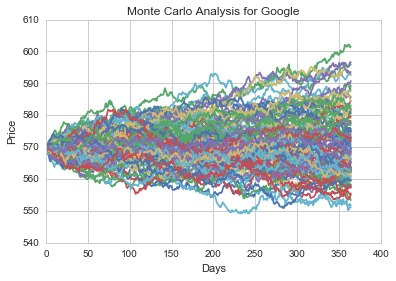

In [30]:
# get start price from GOOG.head()
start_price = 569.85

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

Get a histogram of the end results for a much larger run.

In [31]:
# set a large numebr of runs
runs = 10000

# create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# set the print options of numpy to only display 0-5 points from an array
# to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # set simulation data point as last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

Now that we have our array of simulations, we can go ahead and plot a histogram and use qunatile to define our risk for this stock. For more info on quantiles, check out this link:
http://en.wikipedia.org/wiki/Quantile

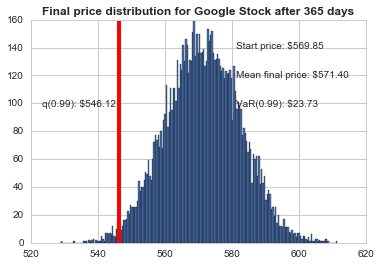

In [32]:
# define q as the 1% empirical qunatile, this basically means that 99%
# of the values should fall between here
q = np.percentile(simulations,1)
    
# plot the distribution of the end prices
plt.hist(simulations,bins=200)

# use plt.figtext to fill in additional info onto the plot

# starting price
plt.figtext(0.6,0.8,s="Start price: $%.2f"%start_price)
# mean ending price
plt.figtext(0.6,0.7,"Mean final price: $%.2f"%simulations.mean())
# variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f"%(start_price - q,))
# display 1% quantile
plt.figtext(0.15,0.6,"q(0.99): $%.2f"%q)
# plot a line at the 1% quantile result
plt.axvline(x=q,linewidth=4,color='r')
# title
plt.title(u"Final price distribution for Google Stock after %s days"%days,
          weight='bold');

Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $18.38 for every investment of 569.85 (the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $18.38 at risk 99% of the time from our Monte Carlo Simulation.

Congrats on finishing the Stock Market Data Analysis project! Here are some additional quesitons and excercises to consider:

    1.) Estimate the values at risk using both methods we learned in this project for a stock not related to technology.
    2.) Build a practice portfolio and see how well you can predict you risk values with real stock information!
    3.) Look further into correlatino of two stocks and see if that gives you any insight into future possible stock prices.